<a href="https://colab.research.google.com/github/sapnachavan7875-lgtm/Data-Science-Learning/blob/main/Copy_of_Recommender_System__using_SVD_roopneet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Recommendation System for Netflix Prize Dataset using SVD

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To load the 'combined_data_1' dataset after uploading it to Jupyter notebook

In [ ]:
df = pd.read_csv('combined_data_1.txt' )
df


# 1: is movie id

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03
...,...,...
1589599,2.0,2005-07-19
171276,1.0,2004-07-29
762998,2.0,2004-07-23
664659,3.0,2004-08-16


In [ ]:
# Reading dataset file
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#not named---->we are naming the columns

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)
#3
#3.5----->float--->rating column



In [ ]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
#To inspect the shape of the datset
dataset.shape



(50970, 2)

In [ ]:
#To print the head of dataset
dataset.head()

#1:----->1st movie
#1xyz rows

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
#3--->1st row
#3--->10th row
#3  merge it
p

,count
Rating,
1.0,4697
2.0,7548
3.0,15667
4.0,14239
5.0,8793


In [ ]:
# get movie count by counting nan values

movie_count = dataset.isnull().sum()[1]

movie_count

#4499 total number of movies present in dataset

26

In [ ]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

43812

In [ ]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

50944

## To plot the distribution of the ratings in as a bar plot

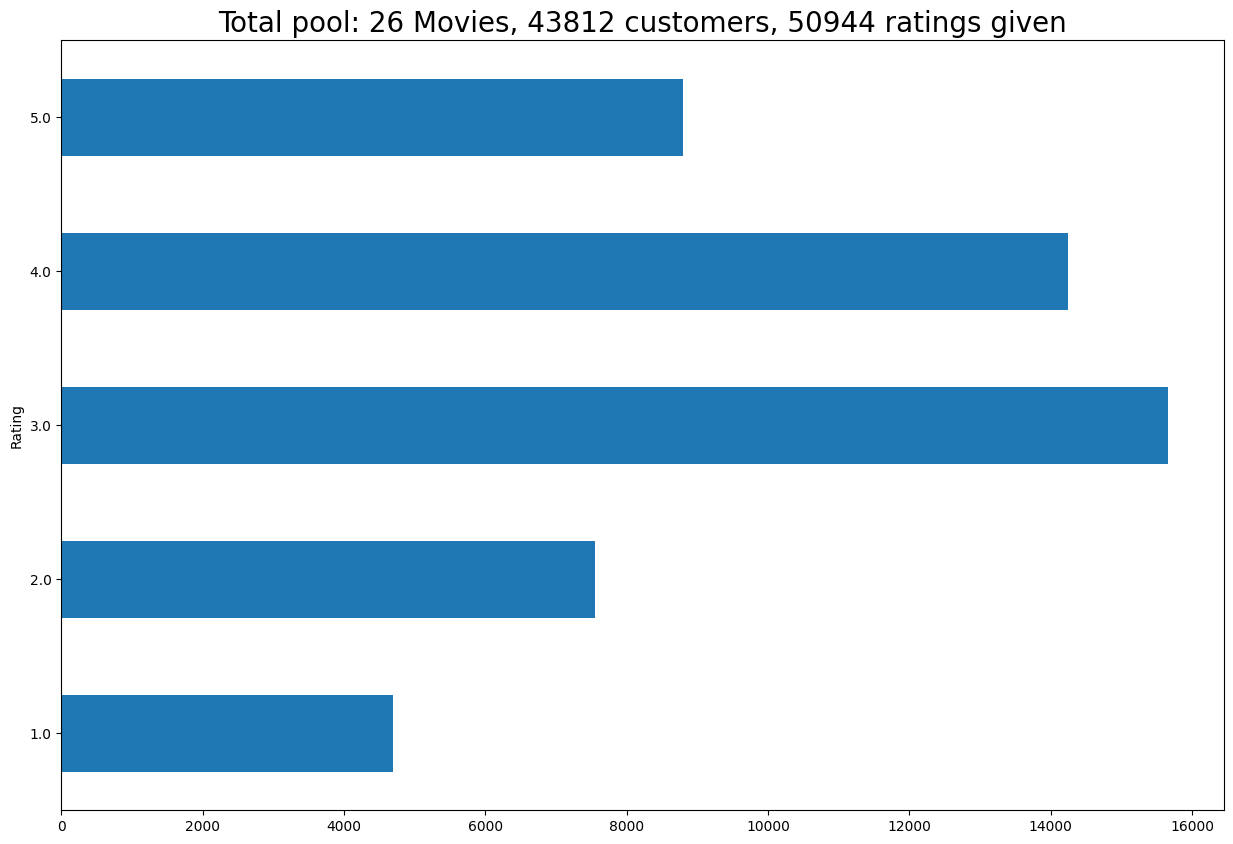

In [ ]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.show()
#plt.axis('off')
#print--->print data  '' 'Total pool'

# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [ ]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [ ]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(26, 1)

In [ ]:
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
3991,True
5011,True
5105,True
20016,True
20112,True


In [ ]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()



df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [ ]:
df_nan['index'][1:]  #i

1       548
2       694
3      2707
4      2850
5      3991
6      5011
7      5105
8     20016
9     20112
10    20362
11    20561
12    21108
13    21234
14    21353
15    21644
16    24344
17    31453
18    42176
19    42716
20    42833
21    43052
22    43256
23    43872
24    45206
25    46414
Name: index, dtype: int64

In [ ]:
df_nan['index'][:-1]

0         0
1       548
2       694
3      2707
4      2850
5      3991
6      5011
7      5105
8     20016
9     20112
10    20362
11    20561
12    21108
13    21234
14    21353
15    21644
16    24344
17    31453
18    42176
19    42716
20    42833
21    43052
22    43256
23    43872
24    45206
Name: index, dtype: int64

In [ ]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [ 1.  1.  1. ... 26. 26. 26.]
Length: 50944


In [ ]:
df_nan.iloc[-1, 0]

46414

In [ ]:
len(dataset)

50970

In [ ]:
#x =zip(df_nan['index'][1:],df_nan['index'][:-1])

In [ ]:
#temp = np.full((1,547), 1)

In [ ]:
#print(temp)

In [ ]:
#tuple(x)

In [ ]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


<ipython-input-42-949fa75c1e41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Movie_Id'] = movie_np.astype(int)
<ipython-input-42-949fa75c1e41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
dataset.tail()

,Cust_Id,Rating,Movie_Id
50965,1589599,2.0,26
50966,171276,1.0,26
50967,762998,2.0,26
50968,664659,3.0,26
50969,1872817,2.0,26


In [ ]:
dataset.shape

(50944, 3)

# Data Cleaning

In [ ]:
f = ['count','mean']
#count and mean

In [ ]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1174.0


In [ ]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 1.0


In [ ]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (50944, 3)


In [ ]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (44546, 3)


In [ ]:

print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [ ]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(39508, 8)


In [ ]:
df_p.head()

Movie_Id,3,8,16,17,18,24,25,26
Cust_Id,,,,,,,,
7,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
424,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
462,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


### To load the movie_titles dataset

In [ ]:
df_title = pd.read_csv('movie_titles _1_.csv', encoding = "Latin-1", header = None, names = ['Movie_Id', 'Year', 'Name'],error_bad_lines=False)


<ipython-input-53-1d7f1fc2f0e4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_title = pd.read_csv('movie_titles _1_.csv', encoding = "Latin-1", header = None, names = ['Movie_Id', 'Year', 'Name'],error_bad_lines=False)
Skipping line 72: expected 3 fields, saw 4
Skipping line 264: expected 3 fields, saw 5
Skipping line 350: expected 3 fields, saw 4
Skipping line 366: expected 3 fields, saw 4
Skipping line 394: expected 3 fields, saw 4
Skipping line 466: expected 3 fields, saw 4
Skipping line 582: expected 3 fields, saw 4
Skipping line 600: expected 3 fields, saw 4
Skipping line 670: expected 3 fields, saw 4
Skipping line 672: expected 3 fields, saw 4
Skipping line 729: expected 3 fields, saw 4
Skipping line 776: expected 3 fields, saw 4
Skipping line 827: expected 3 fields, saw 4
Skipping line 834: expected 3 fields, saw 4
Skipping line 891: expected 3 fields, saw 4
Skipping line 913: ex

In [ ]:
#df_title = pd.read_csv('movie_titles _1_.csv', encoding = "Latin-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


# To install the scikit-surprise library for implementing SVD

### Run the following command in the Anaconda Prompt to install surprise package

In [ ]:
!pip install surprise

In [ ]:
#conda install -c conda-forge scikit-surprise

In [ ]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1201  1.1124  1.1177  1.1168  0.0032  
MAE (testset)     0.8916  0.8835  0.8858  0.8870  0.0034  
Fit time          0.72    1.01    0.68    0.80    0.15    
Test time         0.09    0.07    0.21    0.13    0.06    


{'test_rmse': array([1.12012152, 1.11241049, 1.11772973]),
 'test_mae': array([0.89164127, 0.88353073, 0.88583904]),
 'fit_time': (0.7180747985839844, 1.0062243938446045, 0.6754777431488037),
 'test_time': (0.09285736083984375, 0.0749971866607666, 0.21420979499816895)}

In [ ]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


## To find all the movies rated as 5 stars by user with userId = 712664

In [ ]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)   # sql

Movie_Id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
Name: Name, dtype: object

# Train an SVD to predict ratings for user with userId = 1

In [ ]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                            Name  Estimate_Score
4352  2002.0                  Curb Your Enthusiasm: Season 3        5.000000
2018  2004.0                                Samurai Champloo        5.000000
721   2003.0                              The Wire: Season 1        5.000000
241   1995.0  Neon Genesis Evangelion: The End of Evangelion        5.000000
871   1954.0                                   Seven Samurai        5.000000
174   1992.0                                  Reservoir Dogs        5.000000
2101  1994.0                          The Simpsons: Season 6        4.994354
4114  1999.0                         The Simpsons: Bart Wars        4.972430
2429  1979.0                      Alien: Collector's Edition        4.970744
404   1987.0                                 Wings of Desire        4.952919
